<a href="https://colab.research.google.com/github/MNaumanShahid/Boston_House_Price/blob/main/Predict_Property_Price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Predict Property Price - Boston Dataset
<img src="https://img-b.udemycdn.com/redactor/raw/article_lecture/2020-10-27_17-07-49-a8962fd1de321f4b71c9ac96ef83863e.jpg">

In [ ]:
# %pip install --upgrade plotly

##Import Statements

In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression

In [3]:
pd.options.display.float_format = '{:,.2f}'.format

##Importing dataset

In [4]:
data = pd.read_csv('boston.csv', index_col=0)

**Characteristics:**  

    :Number of Instances: 506

    :Number of Attributes: 13 numeric/categorical predictive. The Median Value (attribute 14) is the target.

    :Attribute Information (in order):
        1. CRIM     per capita crime rate by town
        2. ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        3. INDUS    proportion of non-retail business acres per town
        4. CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        5. NOX      nitric oxides concentration (parts per 10 million)
        6. RM       average number of rooms per dwelling
        7. AGE      proportion of owner-occupied units built prior to 1940
        8. DIS      weighted distances to five Boston employment centres
        9. RAD      index of accessibility to radial highways
        10. TAX      full-value property-tax rate per $10,000
        11. PTRATIO  pupil-teacher ratio by town
        12. B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
        13. LSTAT    % lower status of the population
        14. PRICE     Median value of owner-occupied homes in $1000's
        
    :Missing Attribute Values: None

    :Creator: Harrison, D. and Rubinfeld, D.L.

##Preliminary Data Exploration

In [5]:
data.shape

(506, 14)

In [7]:
data.columns.values

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT', 'PRICE'], dtype=object)

##Data Cleaning

In [8]:
data.isna().values.any()

False

In [11]:
data.duplicated().values.any()

False

##Descriptive Stats

In [13]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,0.01,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,0.08,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,0.26,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,88.98,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


##Visualising Features

*italicized text*#### House Prices

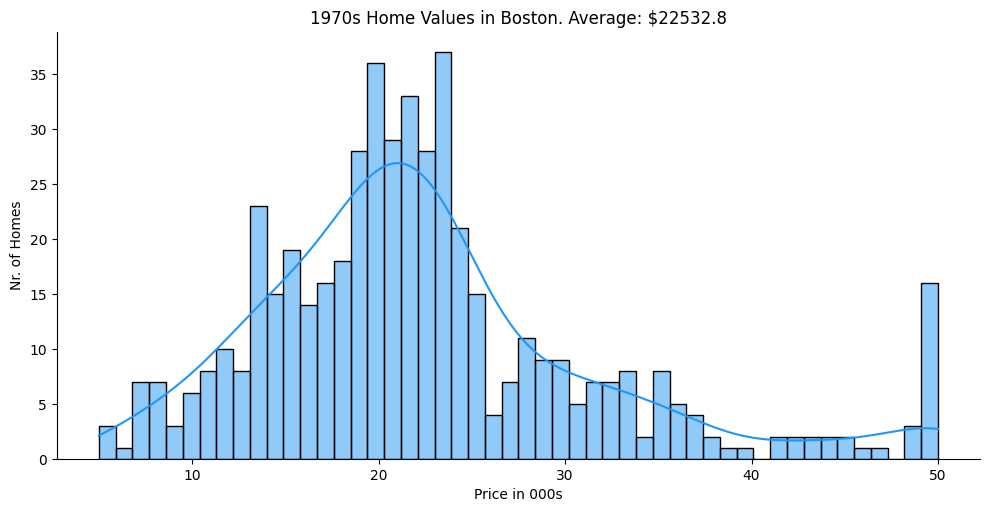

In [62]:
sns.displot(data['PRICE'],
            bins=50,
            aspect=2,
            kde=True,
            color='#2196f3')

plt.title(f'1970s Home Values in Boston. Average: ${(1000*data.PRICE.mean()):.6}')
plt.xlabel('Price in 000s')
plt.ylabel('Nr. of Homes')

plt.show()

#### Distance to Employment - Length of Commute

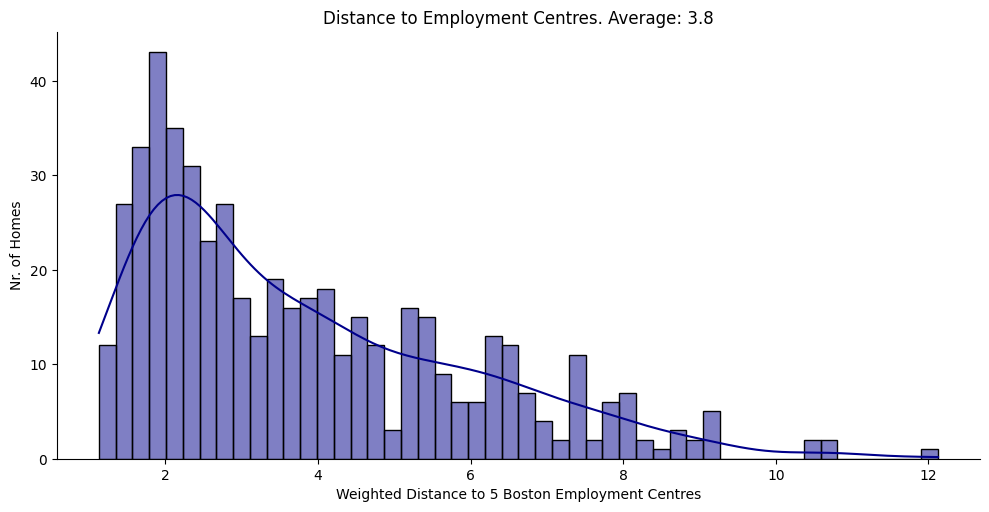

In [63]:
sns.displot(data.DIS,
            bins=50,
            aspect=2,
            kde=True,
            color='darkblue')

plt.title(f'Distance to Employment Centres. Average: {(data.DIS.mean()):.2}')
plt.xlabel('Weighted Distance to 5 Boston Employment Centres')
plt.ylabel('Nr. of Homes')

plt.show()

#### Number of Rooms

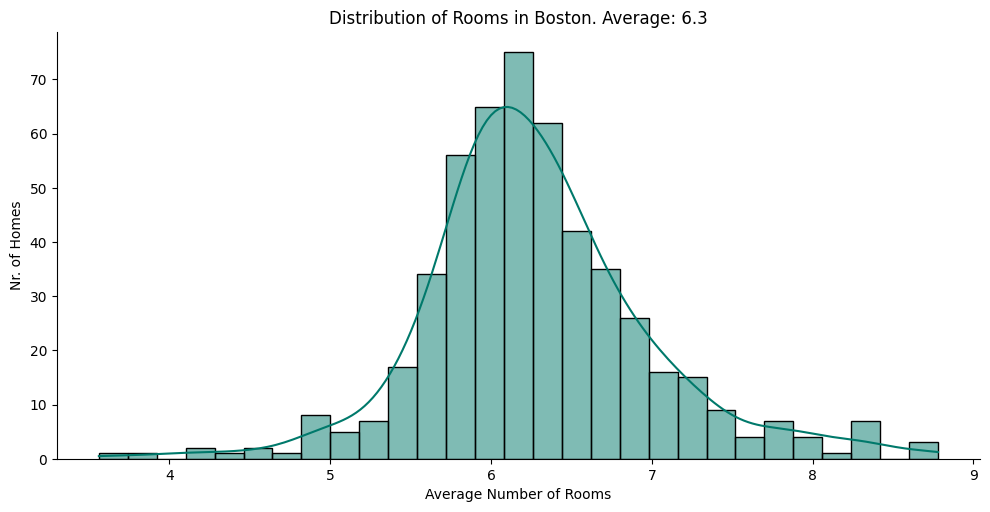

In [65]:
sns.displot(data.RM,
            aspect=2,
            kde=True,
            color='#00796b')

plt.title(f'Distribution of Rooms in Boston. Average: {data.RM.mean():.2}')
plt.xlabel('Average Number of Rooms')
plt.ylabel('Nr. of Homes')

plt.show()

#### Access to Highways

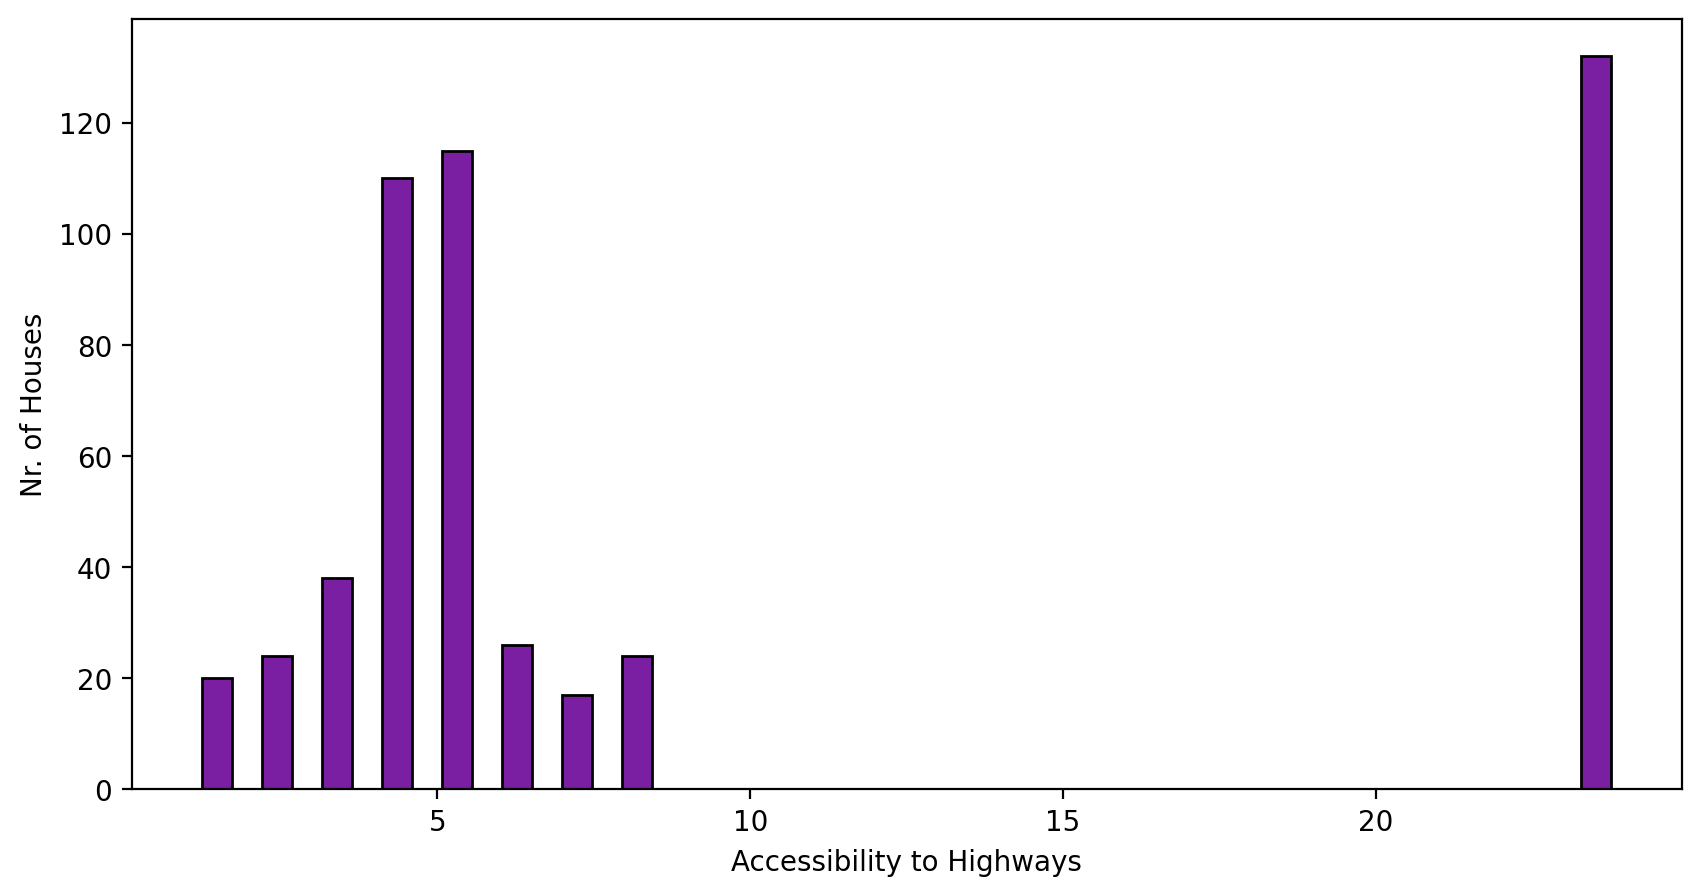

In [64]:
plt.figure(figsize=(10, 5), dpi=200)

plt.hist(data['RAD'],
         bins=24,
         ec='black',
         color='#7b1fa2',
         rwidth=0.5)

plt.xlabel('Accessibility to Highways')
plt.ylabel('Nr. of Houses')
plt.show()

###Proximity to River

In [66]:
river_access = data['CHAS'].value_counts()

bar = px.bar(x=['No', 'Yes'],
             y=river_access.values,
             color=river_access.values,
             color_continuous_scale=px.colors.sequential.haline,
             title='Next to Charles River?')

bar.update_layout(xaxis_title='Property Located Next to the River?',
                  yaxis_title='Number of Homes',
                  coloraxis_showscale=False)
bar.show()

##Splitting Dataset

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], test_size=0.2, random_state=10)

##Training Model

$$ PR \hat ICE = \theta _0 + \theta _1 RM + \theta _2 NOX + \theta _3 DIS + \theta _4 CHAS ... + \theta _{13} LSTAT$$

In [67]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

rsquared = regressor.score(X_train, y_train)

print(f'Training data r-squared: {rsquared:.2}')

Training data r-squared: 0.75


##Evaluating Coefficients

In [69]:
coef = pd.DataFrame(regressor.coef_, index=data.columns.values[:-1], columns=['Coefficient'])
coef

,Coefficient
CRIM,-0.13
ZN,0.06
INDUS,-0.01
CHAS,1.97
NOX,-16.27
RM,3.11
AGE,0.02
DIS,-1.48
RAD,0.30
TAX,-0.01


In [73]:
premium = coef.loc['RM'].values[0] * 1000
print(f'The price premium for having an extra room is ${premium:.5}')

The price premium for having an extra room is $3108.5


### Analyse the Estimated Values & Regression Residuals


In [52]:
predicted_price = regressor.predict(X_train)
residuals = (y_train - predicted_price)

In [55]:
scatter = px.scatter(x=y_train, y=predicted_price, title="Actual vs Predicted Price")
scatter.update_layout(xaxis_title='Actual Price', yaxis_title='Predicted Price')
scatter.show()

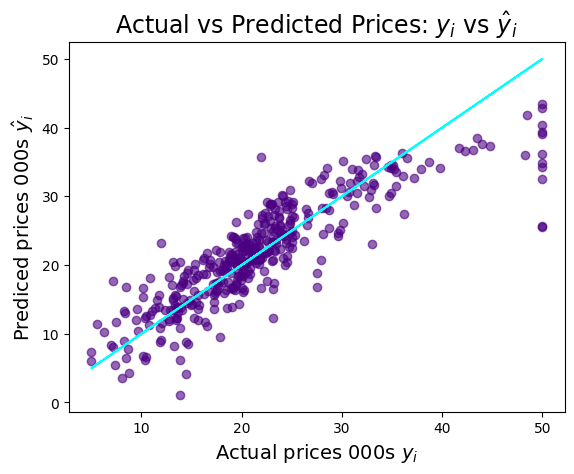

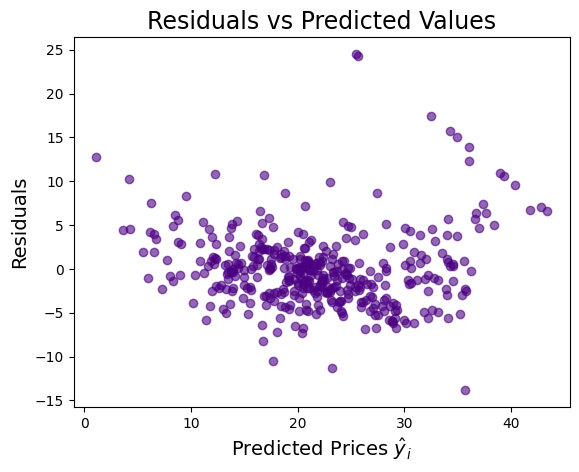

In [75]:
# Original Regression of Actual vs. Predicted Prices
plt.figure(dpi=100)
plt.scatter(x=y_train, y=predicted_price, c='indigo', alpha=0.6)
plt.plot(y_train, y_train, color='cyan')
plt.title(f'Actual vs Predicted Prices: $y _i$ vs $\hat y_i$', fontsize=17)
plt.xlabel('Actual prices 000s $y _i$', fontsize=14)
plt.ylabel('Prediced prices 000s $\hat y _i$', fontsize=14)
plt.show()

# Residuals vs Predicted values
plt.figure(dpi=100)
plt.scatter(x=predicted_price, y=residuals, c='indigo', alpha=0.6)
plt.title('Residuals vs Predicted Values', fontsize=17)
plt.xlabel('Predicted Prices $\hat y _i$', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.show()

###Model Performance r-squared

In [80]:
print(f"Model test date r-squared: {regressor.score(X_test, y_test):.2}")

Model test date r-squared: 0.67


##Predicting Property Value using mean value features

In [76]:
features = data.drop(['PRICE'], axis=1)
average_vals = features.mean().values
property_stats = pd.DataFrame(data=average_vals.reshape(1, len(features.columns)),
                              columns=features.columns)
property_stats

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,3.61,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65


In [79]:
price_estimate = regressor.predict(property_stats)[0] * 1000
print(f'The price estimate is ${price_estimate:.6}')

The price estimate is $22383.8
